# Creating Data 

In [39]:
import pandas as pd
import statsmodels.datasets.co2 as co2
import matplotlib.pyplot as plt

In [ ]:
co2_data = co2.load().data
print(co2_data)

# max and min values
print(co2_data['co2'].max())
print(co2_data['co2'].min())

# difference between max and min values
print(co2_data['co2'].max() - co2_data['co2'].min())


              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]
373.9
313.0
60.89999999999998


Um Daten zu haben, welche repräsentativ für die Messdaten stehen, werden daten heruntergeladen, die dann auf mögliche Messdaten für ein Fahrzeug angepasst werden. Da die Seminararbeit und dieser dazugehörige Code für eine Vorstellung von Vorgehen genutzt wird, werden Daten genommen, bei denen bekannt ist, dass sie betimmte Muster vorweisen. 

In [41]:
# creating new data frame with the colum co2 minus min value 
co2_data['co2_adjusted'] = co2_data['co2'] - co2_data['co2'].min()
car_data = co2_data['co2_adjusted']

# renaming the column  co2_adjusted to speed
car_data = car_data.rename('speed')




# instead of the date I want to have a date wich start at the day 2022-01-01 at 0:00 and for every row I want to add 10 Seconds

import pandas as pd
car_data.index = pd.date_range(start='2022-01-01', periods=len(car_data), freq='1S')
print(car_data)


2022-01-01 00:00:00     3.1
2022-01-01 00:00:10     4.3
2022-01-01 00:00:20     4.6
2022-01-01 00:00:30     4.5
2022-01-01 00:00:40     3.4
                       ... 
2022-01-01 06:19:50    57.3
2022-01-01 06:20:00    57.8
2022-01-01 06:20:10    58.2
2022-01-01 06:20:20    58.3
2022-01-01 06:20:30    58.5
Freq: 10s, Name: speed, Length: 2284, dtype: float64


C:\Users\Maximilian\AppData\Local\Temp\ipykernel_46628\202747847.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  car_data.index = pd.date_range(start='2022-01-01', periods=len(car_data), freq='10S')


Für die nächsten Schritte wird angenommen, dass aus der Tabelle Messung die Messdaten eines Fahrzeugs entnommen wurden und weiter untersucht werden. Der Timestep wurde dafür auch in ein Date-Format umgewandelt. 

<Axes: >

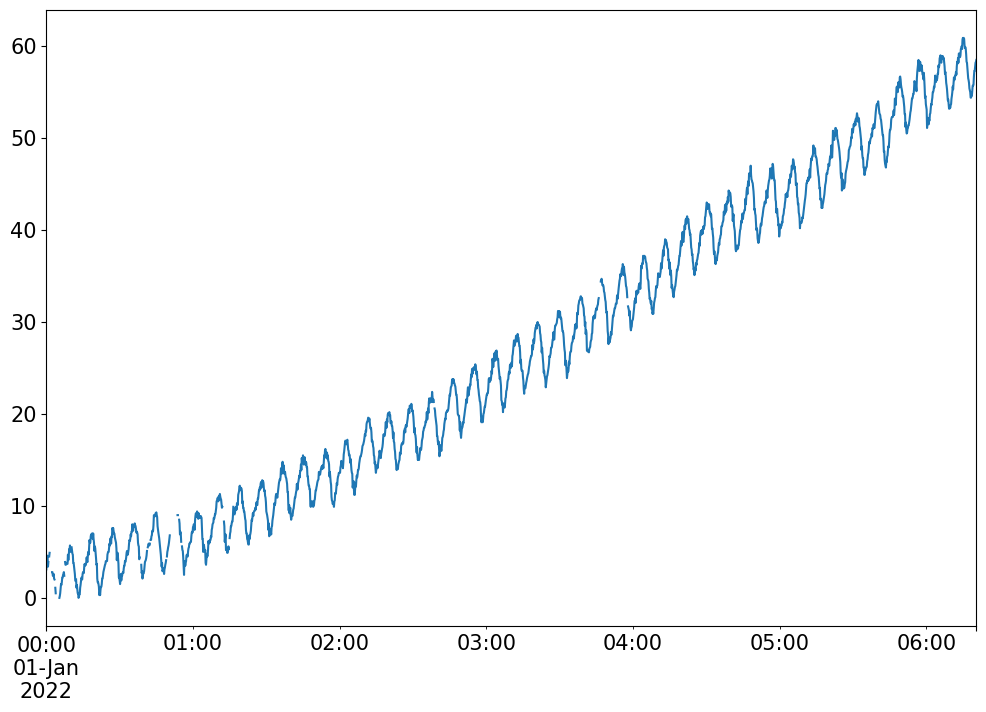

In [42]:
car_data.plot()

In the plot its visible that there are some NaN values inside the data, we need to fill the NaN values with correct data. The gabs will be filled with interpolation

In [43]:
car_data = car_data.fillna(car_data.interpolate())

<Axes: >

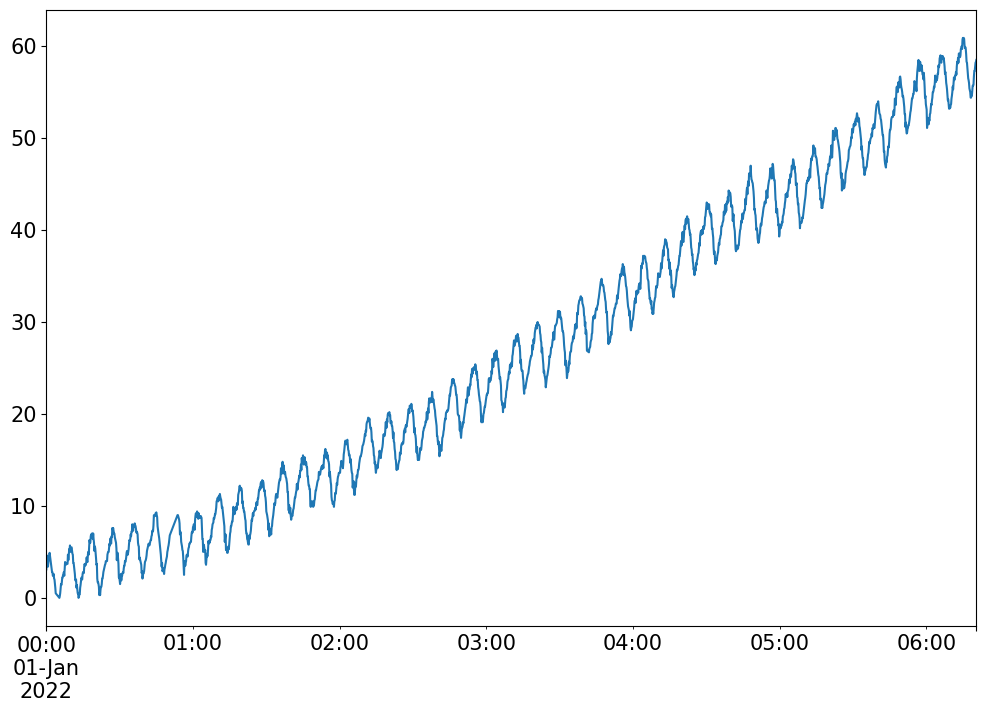

In [44]:
car_data.plot()

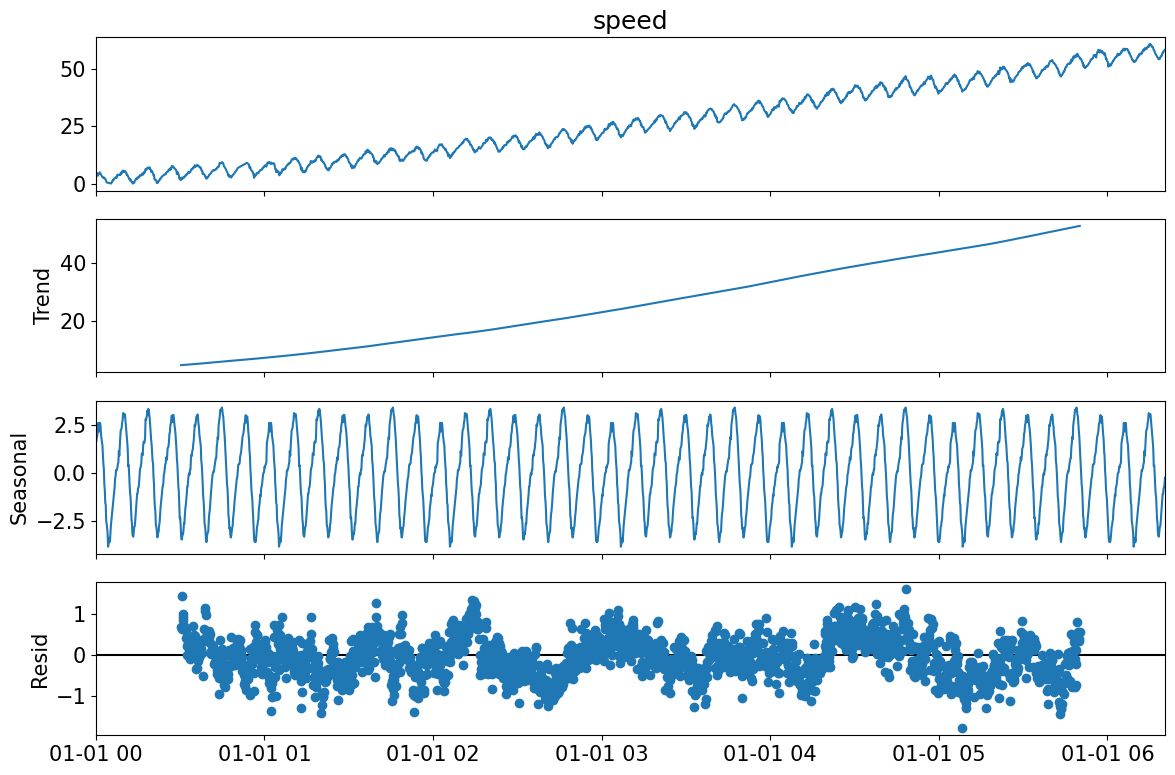

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(car_data, model='additive', period=365)
result.plot()
plt.show()

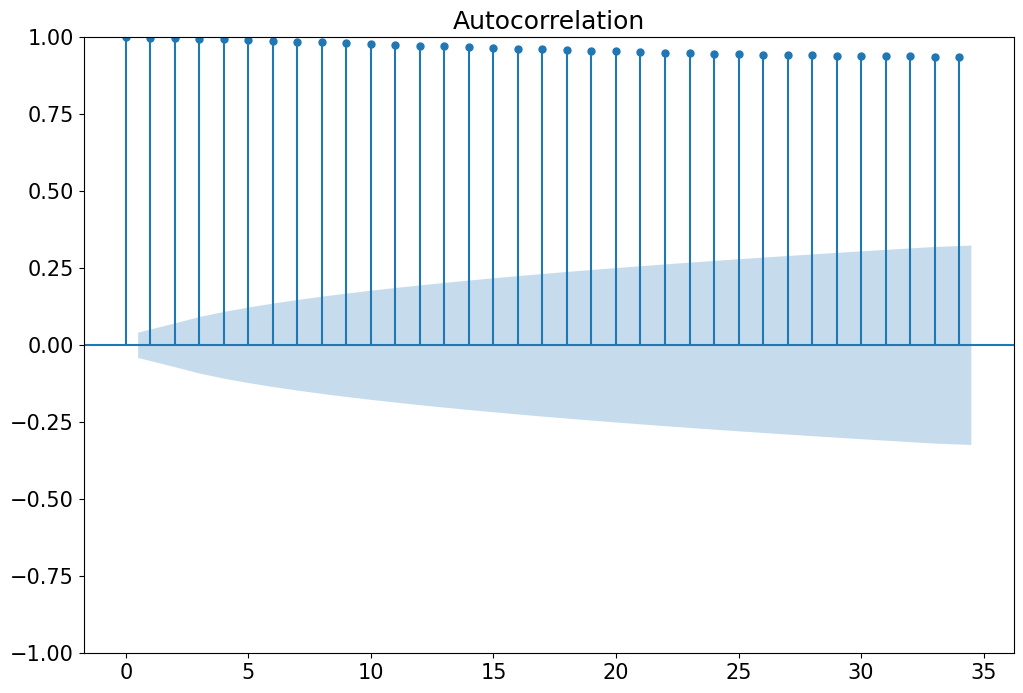

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(car_data)
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(car_data.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: 0.03378459745816527
ADF p-values: 0.961238452828603
ADF number of lags used: 27
ADF number of observations: 2256
ADF critical values: {'1%': -3.4332519309441296, '5%': -2.8628219967376647, '10%': -2.567452466810334}
ADF best information criterion: 2578.39090925253


# Forcasting

## ARIMA

In [52]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [53]:
train, test = train_test_split(car_data.values, train_size=2200)

In [54]:
model = pm.auto_arima(train, seasonal=True, m=52)
preds = model.predict(test.shape[0])

: 

In [ ]:
plt.plot(car_data.values[:2200], train)
plt.plot(car_data.values[2200:], preds)
plt.show()

## Random forest

In [ ]:
import numpy as np

seconds = [x.total_seconds() for x in car_data.index - car_data.index[0]]
ten_seconds = [x.total_seconds() / 10 for x in car_data.index - car_data.index[0]]
minutes = [x.total_seconds() / 60 for x in car_data.index - car_data.index[0]]

X = np.array([seconds, ten_seconds, minutes]).T

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
